In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\ksushma\Practise\Admission Prediction.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df=df.rename(columns={'Serial No.':'SerialNo', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL',
                      'University Rating':'UniversityRating','LOR ':'LOR','Chance of Admit ':'ChanceOfAdmit'})
df.columns


Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

In [8]:
df.shape

(500, 9)

In [9]:
df.head()

,SerialNo,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


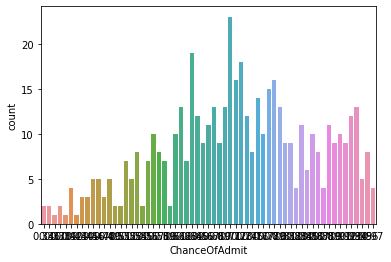

In [10]:
sns.countplot(df['ChanceOfAdmit'])

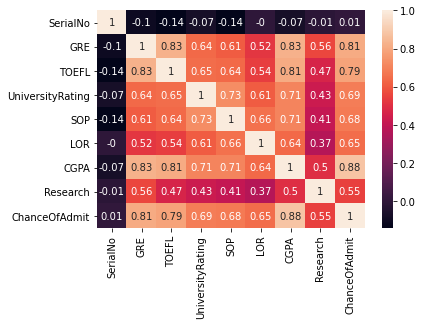

In [11]:
corr=df.corr().round(2)
sns.heatmap(data=corr,annot=True)

In [12]:
df.corr()['ChanceOfAdmit'].sort_values(ascending = False)

ChanceOfAdmit       1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
SerialNo            0.008505
Name: ChanceOfAdmit, dtype: float64

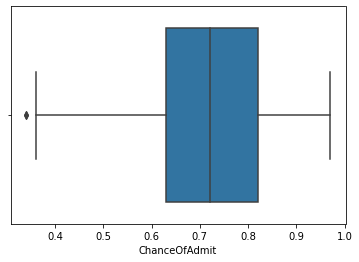

In [13]:
sns.boxplot(df['ChanceOfAdmit'])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('ChanceOfAdmit',axis=1)
y=df['ChanceOfAdmit']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=2)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [18]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
x=linear_model.LinearRegression()
x.fit(X_train,y_train)


LinearRegression()

In [20]:
predictions=x.predict(X_test)
predictions

array([0.92117173, 0.78069881, 0.59407316, 0.70871663, 0.80367334,
       0.87041469, 0.50285893, 0.64992875, 0.80380419, 0.82173068,
       0.70727928, 0.72974201, 0.67229081, 0.91459277, 0.83282156,
       0.53304333, 0.85459836, 0.58073301, 0.55270137, 0.58898836,
       0.68485173, 0.58512088, 0.72367983, 0.79918008, 0.76622524,
       0.6302653 , 0.96719863, 0.84142639, 0.62295407, 0.75390828,
       0.59084215, 0.7463973 , 0.57948849, 0.85134466, 0.6369791 ,
       0.7440871 , 0.5755639 , 0.93748955, 0.64565558, 0.69922845,
       0.96878721, 0.5648855 , 0.6873624 , 0.84993849, 0.91357034,
       0.57509129, 0.93081038, 0.81349677, 0.80244132, 0.90270938,
       0.86820821, 0.56747993, 0.70328488, 0.5451252 , 0.94239049,
       0.58843838, 0.9405593 , 0.72892334, 0.66837039, 0.49669049,
       0.6554032 , 0.6784729 , 0.61391643, 0.63098485, 0.43722392,
       0.58753256, 0.88150758, 0.87363289, 0.66086294, 0.72108148,
       0.62833686, 0.79213607, 0.69181858, 0.57927541, 0.56617

In [21]:
from sklearn.metrics import r2_score

In [22]:
accuracy=r2_score(y_test,predictions)
accuracy

0.8303599587553687